In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df =  df.drop(['sepal length (cm)','sepal width (cm)'],axis ="columns")
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


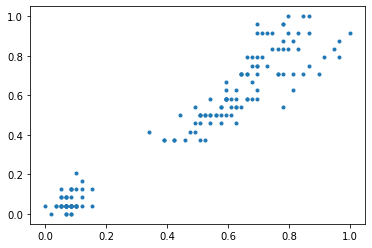

In [29]:
scaler = MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = scaler.transform(df[["petal length (cm)"]])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
plt.scatter(df["petal length (cm)"],df['petal width (cm)'],marker =".")

In [30]:

sse = []
k_range = range(1,10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)"]],df[['petal width (cm)']])
    sse.append(km.inertia_)
    

In [31]:
sse

[13.33885090491238,
 1.942077892328834,
 0.7084355277936197,
 0.36131890580612214,
 0.25201503279494764,
 0.16993333193767124,
 0.12271555792670413,
 0.09786098238190011,
 0.07391756439028094]

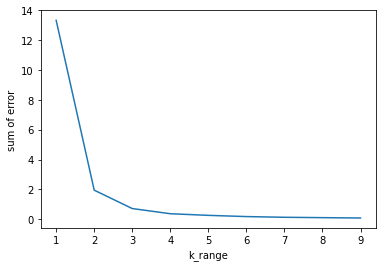

In [32]:
plt.xlabel('k_range')
plt.ylabel('sum of error')
plt.plot(k_range,sse)

In [38]:
km =KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[["petal length (cm)"]],df[['petal width (cm)']])


In [39]:
df["cluster"]=y_predicted

In [40]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [41]:
df0 = df[df.cluster ==0 ]
df1 = df[df.cluster ==1 ]
df2 = df[df.cluster ==2 ]


No handles with labels found to put in legend.


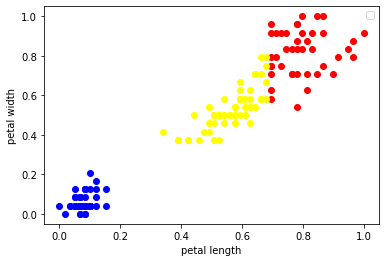

In [44]:
a0 = plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color ="red")
a1 = plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color ="blue")
a2 = plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color ="yellow")

plt.xlabel('petal length')
plt.ylabel("petal width")
plt.legend()